In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 125 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 202 kB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6637866 sha256=436ee62f44e715e5f3d82f7d0c4def0439a170e307554dfd34c4a505be54824b
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
from prophet import Prophet

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data=pd.read_csv('/content/train_IxoE5JN.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [ ]:
data.isna().sum()

row_id         0
datetime       0
energy      1900
dtype: int64

In [ ]:
data['datetime']=pd.to_datetime(data.datetime)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    94992 non-null  int64         
 1   datetime  94992 non-null  datetime64[ns]
 2   energy    93092 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.2 MB


In [ ]:
df = data.fillna(method='ffill')

In [ ]:
def create_df_prophet(df1):
  df2=df1.loc[:,['datetime','energy']]
  df2.rename({'datetime': 'ds', 'energy': 'y'}, axis=1,inplace=True)
  print(df2.head())
  return df2

df = create_df_prophet(df)

                   ds            y
0 2008-03-01 00:00:00  1259.985563
1 2008-03-01 01:00:00  1095.541500
2 2008-03-01 02:00:00  1056.247500
3 2008-03-01 03:00:00  1034.742000
4 2008-03-01 04:00:00  1026.334500


In [ ]:
def mean_absolute(y_true,y_pred):
  y_true,y_pred = np.array(y_true),np.array(y_pred)
  mape = np.mean(np.abs((y_true-y_pred)/y_true))*100
  print(mape)
  return mape

In [ ]:
df

,ds,y
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500
...,...,...
94987,2018-12-31 19:00:00,2528.446800
94988,2018-12-31 20:00:00,2461.883600
94989,2018-12-31 21:00:00,2365.994400
94990,2018-12-31 22:00:00,2342.942800


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8jvmheba/io1ogwi8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8jvmheba/o9lwkmgf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14832', 'data', 'file=/tmp/tmp8jvmheba/io1ogwi8.json', 'init=/tmp/tmp8jvmheba/o9lwkmgf.json', 'output', 'file=/tmp/tmp8jvmheba/prophet_model_ccwkbw3/prophet_model-20221120175317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:53:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


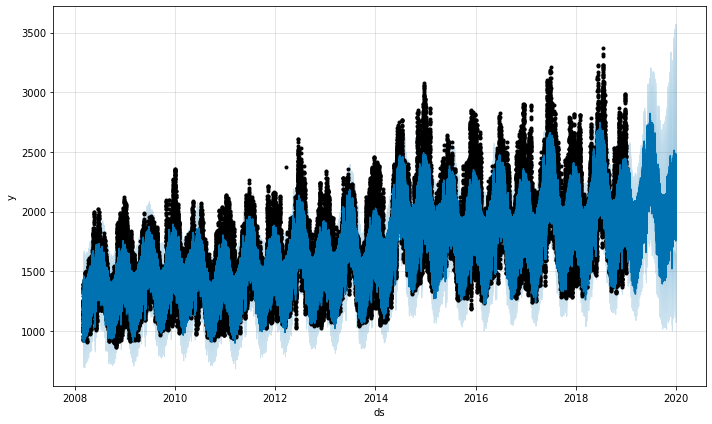

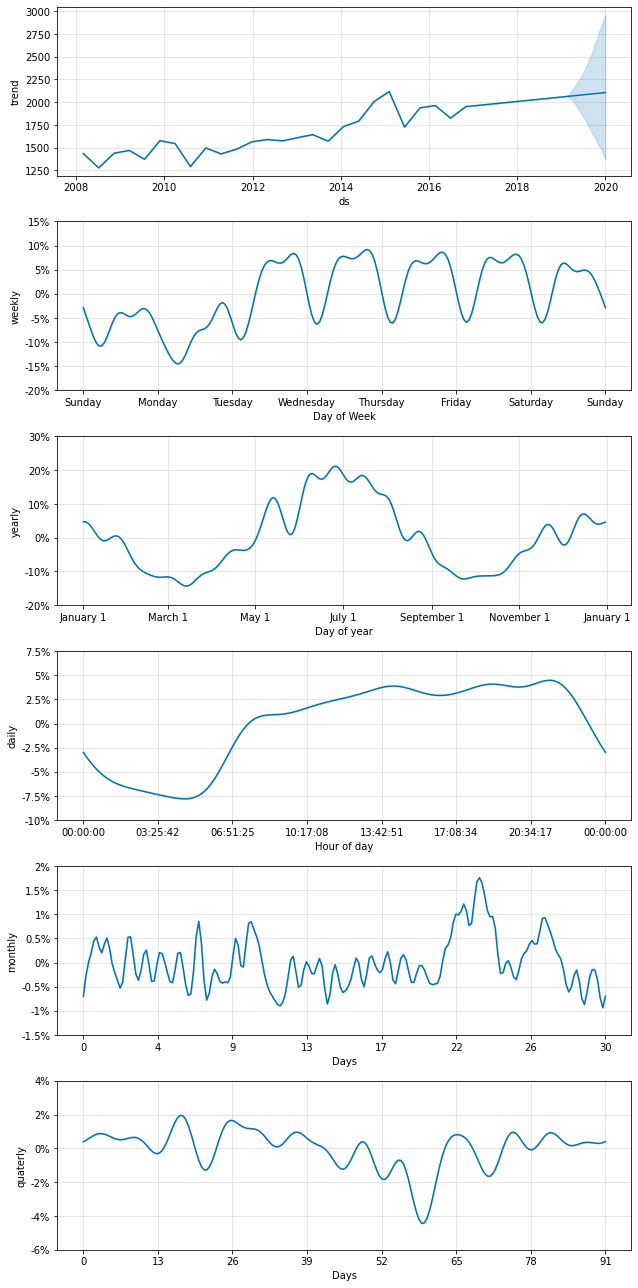

In [ ]:
m_linear = Prophet(growth = 'linear',holidays_prior_scale=20,changepoint_prior_scale=25,seasonality_mode='multiplicative',seasonality_prior_scale=30,weekly_seasonality=False,
                         daily_seasonality = False,yearly_seasonality = False).add_seasonality(name='monthly',period=30.5,fourier_order=55).add_seasonality(
                             name='daily',period=1,fourier_order=10).add_seasonality(name='weekly',period=7,fourier_order=20).add_seasonality(
                                 name='yearly',period=365.25,fourier_order=20).add_seasonality(name='quaterly',period=365.25/4,fourier_order=15,prior_scale=10)
                         
m_linear.fit(df)

future = m_linear.make_future_dataframe(freq='H',periods=24*365)
forecast = m_linear.predict(future)
fig1 = m_linear.plot(forecast)
fig2 = m_linear.plot_components(forecast)
#cv_results = cross_validation(m_linear,initial='70000 hours', horizon='4320 hours')
#mape_baseline = mean_absolute(cv_results.y,cv_results.yhat)



In [ ]:
future.head()

,ds
0,2008-03-01 00:00:00
1,2008-03-01 01:00:00
2,2008-03-01 02:00:00
3,2008-03-01 03:00:00
4,2008-03-01 04:00:00


In [54]:
dfx = pd.read_csv('/content/test_WudNWDM.csv')
dfx.rename({'datetime': 'ds'}, axis=1,inplace=True)
dfy = pd.DataFrame()
dfy['ds'] = dfx['ds']
dfy.head()
forecast = m_linear.predict(dfy)

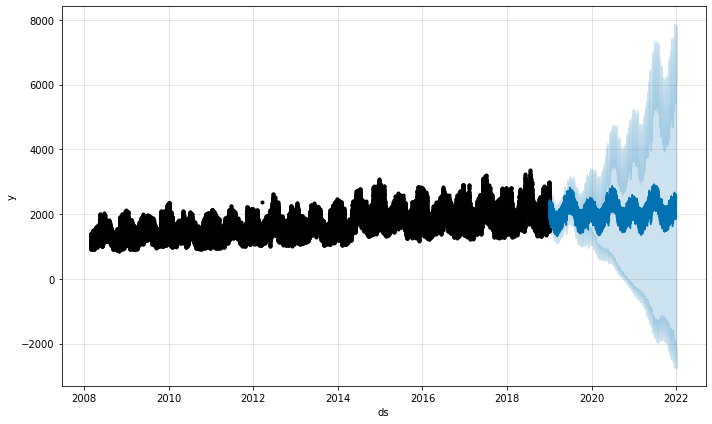

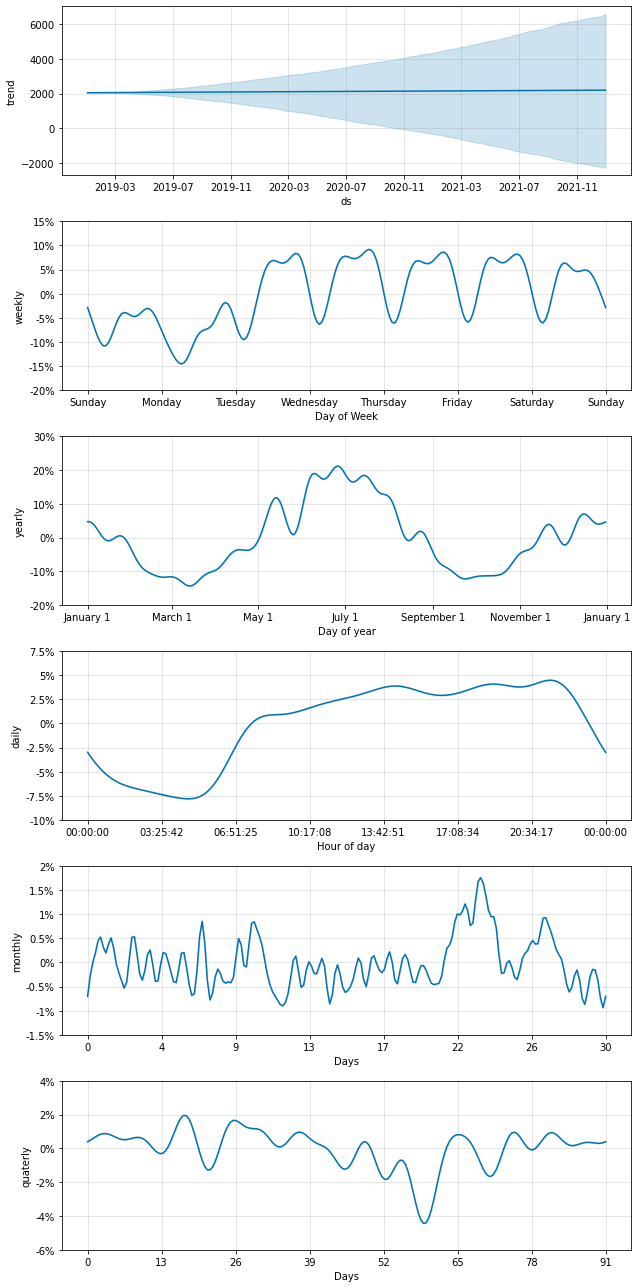

In [55]:
fig1 = m_linear.plot(forecast)
fig2 = m_linear.plot_components(forecast)

In [56]:
def submission(path, forecast):
  df = pd.read_csv(path)
  df2 = pd.DataFrame(columns=['row_id','energy'])
  df2['row_id'] = df['row_id']
  df2['energy'] = forecast.yhat_upper - (0.15*forecast.yhat_upper)
  df2.to_csv('/content/submission1.csv',index=False)
  return

p = '/content/test_WudNWDM.csv'
submission(p,forecast)


In [ ]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[10,15,20,25,30],
              'n_changepoints' : [100,150,200],
               'seasonality_prior_scale' : [10,15,20,25,300]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

In [ ]:
strt='2018-01-01 00:00:00'
end='2018-12-31 23:00:00'
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model =Prophet(growth = 'linear',changepoint_prior_scale=13,seasonality_mode='multiplicative',seasonality_prior_scale=13,weekly_seasonality=True,n_changepoint
                         daily_seasonality = True,yearly_seasonality = True).add_seasonality(name='Half_yearly',period=165,fourier_order=15)
    train_model.fit(df[(df['ds']<=strt)])
    train_forecast = train_model.make_future_dataframe(freq='H',periods=24*365,include_history = False)
    train_forecast = train_model.predict(train_forecast[:-1])
    test=train_forecast[['ds','yhat']]
    Actual = df[(df['ds']>strt) & (df['ds']<=end)]
    MAPE = mean_absolute(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

SyntaxError: ignored